In [1]:
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 데이터에 있는 모든 토큰의 인덱스를 구축합니다
token_index = {} # dictionary

for sample in samples:
    # split() 메서드를 사용해 샘플을 토큰으로 나눕니다.
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1
            # 인덱스 0은 사용하지 않습니다.
            # {'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6, 'dog': 7, 'ate': 8, 'my': 9, 'homework.': 10}
            # 샘플을 벡터로 변환

max_length = 10

results=np.zeros((len(samples),max_length, max(token_index.values())+1)) # (2,10,11)
       
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.


In [2]:
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

characters = string.printable # 출력 가능한 모든 ASCII 문자, 100개
token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 50

results = np.zeros((len(samples), max_length,
max(token_index.values())+1)) # (2, 50, 101)

for i, sample in enumerate(samples):
    for j, character in enumerate(sample[:max_length]):
        index = token_index.get(character)
        results[i, j, index] = 1.

In [3]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 가장 빈도가 높은 1,000개의 단어만 선택하도록 Tokenizer 객체를 만듭니다.
tokenizer = Tokenizer(num_words=1000)
# Turns strings into lists of integer indices by word_index
tokenizer.fit_on_texts(samples) # 입력에 맞게 내부의 word_index를 만드는 함수
# tokenizer.word_index = {'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}

# Turns strings into lists of integer indices
sequences = tokenizer.texts_to_sequences(samples)
# Sequences = [[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]
# directly get the one-hot binary representations.
# Vectorization modes other than one-hot encoding are supported by this tokenizer!
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# 계산된 단어 인덱스를 구합니다.
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Using TensorFlow backend.


Found 9 unique tokens.


In [4]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 1,000개 이상의 단어가 있다면 hash collisions
dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality)) # (2, 10, 1000)
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        # Hashes the word into a random integer index between 0 and 1,000
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

In [5]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

In [6]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000 # Number of words to consider as features
maxlen = 20 # Cuts off the text after this number of words

#(among the max_features most common words)
(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words=max_features) # Loads the data as lists of integers

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
# lists of integers → a 2D integer tensor of shape (samples, maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
# padded with 0s for shorter sequences or truncated for longer sequences

In [7]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
# Specifies the maximum input length to the Embedding layer
# so you can later flatten the embedded inputs.
# Output of the activations have shape (samples, maxlen, 8) of 3D with 8 Output.

model.add(Flatten())
# Flattens the 3D tensor of embeddings into a 2D tensor of shape (samples, maxlen * 8)

model.add(Dense(1, activation='sigmoid')) # Adds the classifier on top
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
epochs=10, batch_size=32, validation_split=0.2)
# training dataset-8000개, test dataset-2000개

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


C:\Users\willk\anaconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 73us/step - loss: 0.6577 - acc: 0.6329 - val_loss: 0.5977 - val_acc: 0.6980
Epoch 2/10
20000/20000 [==============================] - 1s 57us/step - loss: 0.5246 - acc: 0.7551 - val_loss: 0.5171 - val_acc: 0.7340
Epoch 3/10
20000/20000 [==============================] - 1s 54us/step - loss: 0.4570 - acc: 0.7879 - val_loss: 0.4988 - val_acc: 0.7464
Epoch 4/10
20000/20000 [==============================] - 1s 55us/step - loss: 0.4246 - acc: 0.8058 - val_loss: 0.4937 - val_acc: 0.7510
Epoch 5/10
20000/20000 [==============================] - 1s 55us/step - loss: 0.4022 - acc: 0.8181 - val_loss: 0.4956 - val_acc: 0.7540
Epoch 6/10
20000/20000 [==============================] - 1s 54us/step - loss: 0.3841 - acc: 0.8278 - val_loss: 0.5000 - val_acc: 0.7540
Epoch 7/10
20000/20000 [==============================] - 1s 58us/step - loss: 0.3676 - acc: 0.8378 - val_loss: 0.5041 - val_acc:

In [8]:
import os
imdb_dir = 'C:/Users/willk/Desktop/Kim/IMDB_SET/aclImdb'
# deep-learning-with-python-notebooks-master
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname),encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [9]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 # Cuts off reviews after 100 words
training_samples = 200 # Trains on 200 samples
validation_samples = 10000 # Validates on 10,000 samples
max_words = 10000 # Considers only the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts) # 입력에 맞게 내부 word_index 생성
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index # 88,582 unique words
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0]) # 25,000 - [0 1 2 ... 24997 24998 24999]
# first shuffles the data, all negative first, then all positive
np.random.shuffle(indices) # [23739 2813 974 ... 167 23722 19124]
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples] # 200
y_train = labels[:training_samples] # 200
x_val = data[training_samples:training_samples + validation_samples] # 10,000
y_val = labels[training_samples:training_samples + validation_samples] # 10,000

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [11]:
glove_dir = 'C:/Users/willk/Desktop/Kim/glove'

embeddings_index = {} # 400,000 words
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'),encoding="utf8") 
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [12]:
embedding_dim = 100 # len(embeddings_index.get('cat'))
embedding_matrix = np.zeros((max_words, embedding_dim)) # max_words=10000

for word, i in word_index.items(): # [('the', 1), ('and', 2), …,('hued', 88582)])
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            # Words not found in the embedding index will be all zeros.
            # [0. 0. 0. … 0. 0.] [-0.038194 -0.24487001 … 0.27061999] - (10000, 100)

In [13]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim,#max_words=10000,embedding_dim=100
input_length=maxlen)) # maxlen = 100
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers[0].set_weights([embedding_matrix])
# (10000, 100)
model.layers[0].trainable = False

In [15]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10, batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 1.3811 - acc: 0.4300 - val_loss: 0.6927 - val_acc: 0.5283
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.7371 - acc: 0.5500 - val_loss: 0.8810 - val_acc: 0.5064
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 0.5496 - acc: 0.6750 - val_loss: 0.8469 - val_acc: 0.5053
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5258 - acc: 0.7800 - val_loss: 0.7310 - val_acc: 0.5275
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2571 - acc: 0.9650 - val_loss: 0.9125 - val_acc: 0.5135
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3469 - acc: 0.8200 - val_loss: 0.7015 - val_acc: 0.5829
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.1062 - acc: 0.9850 - val_loss: 1.3145 - val_acc: 0.5112
Epoch 8/10
200/200 [========

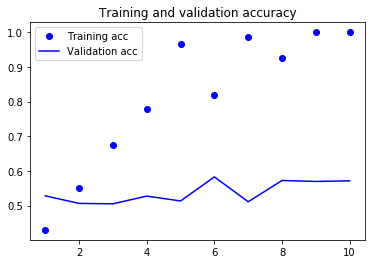

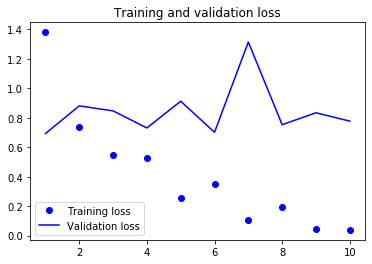

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show() 

In [18]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10, batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


C:\Users\willk\anaconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 5ms/step - loss: 0.6901 - acc: 0.4650 - val_loss: 0.6958 - val_acc: 0.5343
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.5091 - acc: 0.9750 - val_loss: 0.6958 - val_acc: 0.5369
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 0.2829 - acc: 0.9850 - val_loss: 0.7047 - val_acc: 0.5018
Epoch 4/10
200/200 [==============================] - 1s 4ms/step - loss: 0.1288 - acc: 1.0000 - val_loss: 0.7070 - val_acc: 0.5289
Epoch 5/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0606 - acc: 0.9950 - val_loss: 0.7215 - val_acc: 0.5090
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0354 - acc: 1.0000 - val_loss: 0.7076 - val_acc: 0.5291
Epoch 7/10
200/200 [==============================] - 1s 6ms/step - loss: 0.0177 - acc: 1.0000 - val_loss: 0.7188 - val_acc: 0.5337
Epoch 8/10
200/200 [========

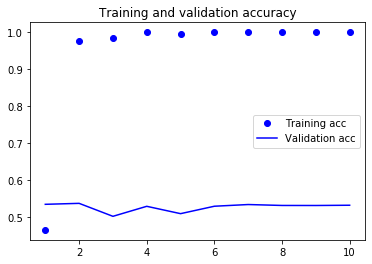

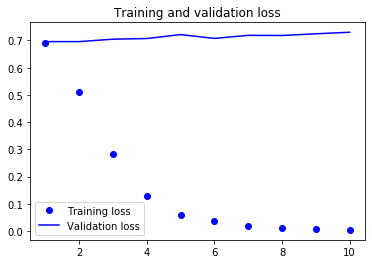

In [19]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show() 

In [22]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type) 
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8") 
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
                
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [23]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 75us/step


[0.7829101774501801, 0.5676000118255615]